# Phục chế ảnh - Image Inpainting

Hầu hết các bạn sẽ có một số bức ảnh cũ bị xuống cấp tại nhà với một số đốm đen, một số nét vẽ, v.v. trên đó. Bạn đã bao giờ nghĩ đến việc khôi phục lại chúng chưa? Chúng ta không thể chỉ xóa chúng trong một công cụ vẽ vì nó sẽ chỉ thay thế các cấu trúc màu đen bằng các cấu trúc màu trắng mà không có tác dụng gì. Trong những trường hợp này, một kỹ thuật được gọi là tô màu lại hình ảnh được sử dụng. Ý tưởng cơ bản rất đơn giản: Thay thế các vết xấu đó bằng các pixel lân cận để trông giống như khu phố. Hãy xem xét hình ảnh được hiển thị bên dưới (lấy từ Wikipedia):

![image](https://docs.opencv.org/4.x/inpaint_basics.jpg)

Một số thuật toán được thiết kế cho mục đích này và OpenCV cung cấp hai trong số chúng. Cả hai đều có thể được truy cập bằng cùng một hàm, `inpaint()`

#### Cú pháp hàm
```python
dst = cv2.inpaint(src, inpaintMask, inpaintRadius, flags)
```
Hàm có **4 đối số bắt buộc**:
1. `src`: Ảnh đầu vào (mảng numpy, ảnh màu hoặc xám, kiểu uint8).
2. `inpaintMask`: Ảnh mặt nạ (mảng numpy, ảnh nhị phân 1 kênh, vùng cần phục chế có giá trị 255).
3. `inpaintRadius`: Bán kính lân cận được sử dụng để phục chế (số thực dương).
4. `flags`: Phương pháp phục chế (`cv2.INPAINT_TELEA` hoặc `cv2.INPAINT_NS`).

Kết quả trả về:
- `dst`: Ảnh đã được phục chế, cùng kích thước và kiểu với src.


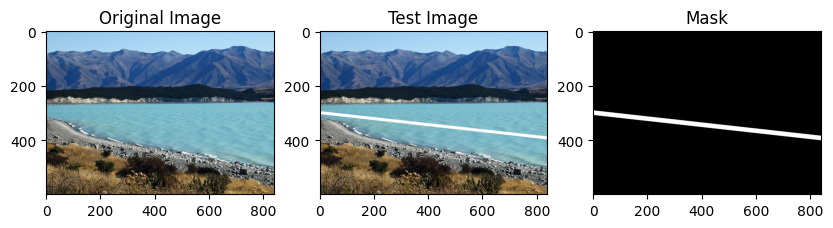

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('images/New_Zealand_Lake.jpg', cv2.IMREAD_COLOR)

# Tạo ảnh thử nghiệm
test = cv2.line(src.copy(), (0, 300), (900, 400), (255, 255, 255), 10)

# Tạo mask
mask = np.zeros(src.shape[:2], dtype=np.uint8)
mask = cv2.line(mask, (0, 300), (900, 400), 255, 15)

plt.figure(figsize=(10, 5))
plt.subplot(131); plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)); plt.title('Original Image')
plt.subplot(132); plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB)); plt.title('Test Image')
plt.subplot(133); plt.imshow(mask, cmap='gray'); plt.title('Mask');

### Thuật toán 1

Thuật toán đầu tiên dựa trên bài báo ***"Kỹ thuật tô màu ảnh dựa trên phương pháp Fast Marching"*** của ***Alexandru Telea*** năm 2004. Thuật toán này dựa trên phương pháp **Fast Marching**. Hãy xem xét một vùng trong ảnh được tô màu. Thuật toán bắt đầu từ ranh giới của vùng này và đi vào bên trong vùng, dần dần tô đầy mọi thứ trong ranh giới trước. Thuật toán lấy một vùng lân cận nhỏ xung quanh điểm ảnh trên vùng lân cận để tô màu. Điểm ảnh này được thay thế bằng tổng trọng số chuẩn hóa của tất cả các điểm ảnh đã biết trong vùng lân cận. Việc lựa chọn trọng số là một vấn đề quan trọng. Trọng số lớn hơn được đưa ra cho các điểm ảnh nằm gần điểm, gần pháp tuyến của ranh giới và các điểm ảnh nằm trên đường viền ranh giới. Sau khi một điểm ảnh được tô màu, nó sẽ di chuyển đến điểm ảnh gần nhất tiếp theo bằng phương pháp Fast Marching. FMM đảm bảo các điểm ảnh gần các điểm ảnh đã biết được tô màu trước, do đó thuật toán này chỉ hoạt động giống như một hoạt động thủ công. Thuật toán này được kích hoạt bằng cách sử dụng cờ, `cv2.INPAINT_TELEA.`


In [19]:
dst1 = cv2.inpaint(src, mask, 3, cv2.INPAINT_NS)

### Thuật toán 2

Thuật toán thứ hai dựa trên bài báo ***"Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting"*** của ***Bertalmio, Marcelo, Andrea L. Bertozzi và Guillermo Sapiro*** năm 2001. Thuật toán này dựa trên động lực học chất lưu và sử dụng các phương trình vi phân riêng phần. Nguyên lý cơ bản là phương pháp tìm kiếm. Đầu tiên, thuật toán di chuyển dọc theo các cạnh từ các vùng đã biết đến các vùng chưa biết (vì các cạnh được cho là liên tục). Thuật toán tiếp tục các đường đẳng quang (các đường nối các điểm có cùng cường độ, giống như các đường đồng mức nối các điểm có cùng độ cao) trong khi khớp các vectơ gradient tại ranh giới của vùng inpainting. Đối với điều này, một số phương pháp từ động lực học chất lưu được sử dụng. Sau khi có được chúng, màu sắc sẽ được tô để giảm phương sai tối thiểu trong khu vực đó. Thuật toán này được kích hoạt bằng cách sử dụng cờ, `cv2.INPAINT_NS`.


In [20]:
dst2 = cv2.inpaint(src, mask, 3, cv2.INPAINT_TELEA)

### Kết quả

(<Axes: title={'center': 'Inpainted Image (Telea)'}>,
 Text(0.5, 1.0, 'Inpainted Image (Telea)'))

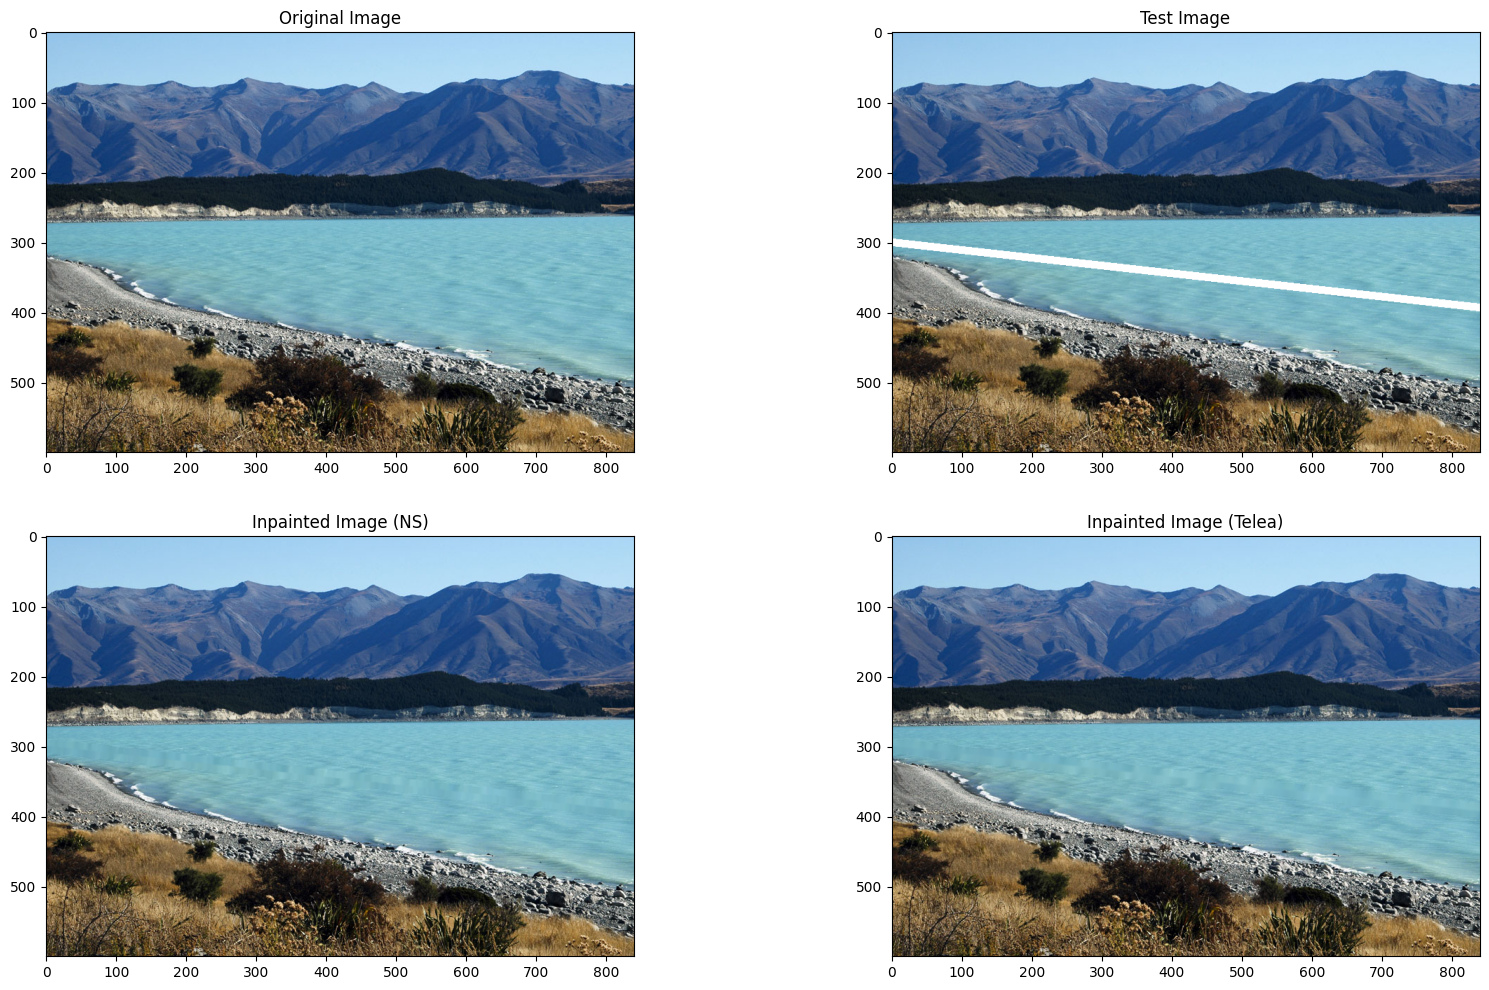

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(221), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(222), plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB)), plt.title('Test Image')
plt.subplot(223), plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB)), plt.title('Inpainted Image (NS)')
plt.subplot(224), plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)), plt.title('Inpainted Image (Telea)')